In [1]:
import scanpy as sc
import scFates as scf
adata=sc.read("data/adata_glia_focus.h5ad")
adata_all=sc.read("data/adata_assigned.h5ad")

In [2]:
scf.set_figure_pubready()

In [3]:
adata_all.obs["sel"]=adata_all.obs_names.isin(adata.obs_names).astype(str)

In [4]:
import numpy as np
dist=-(np.diff(adata.obsm["X_umap"].max(axis=0)-adata.obsm["X_umap"].min(axis=0))[0])

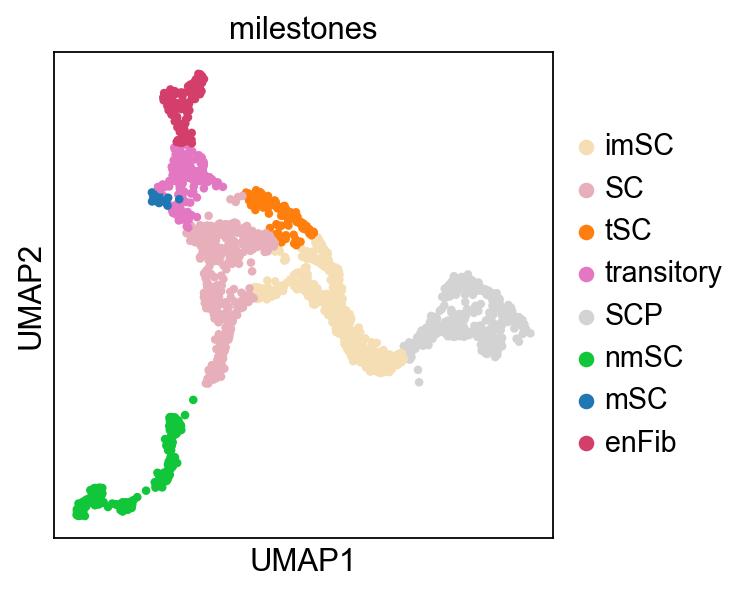

In [5]:
sc.set_figure_params()
sc.pl.umap(adata[adata.obs.t.sort_values().index],color="milestones")

/home/lfaure/miniconda3/envs/bio-gpu-18/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'sel' as categorical
<ipython-input-6-c19590ca404c>:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb1 = mpl.colorbar.ColorbarBase(cax, cmap=plt.get_cmap("viridis"),


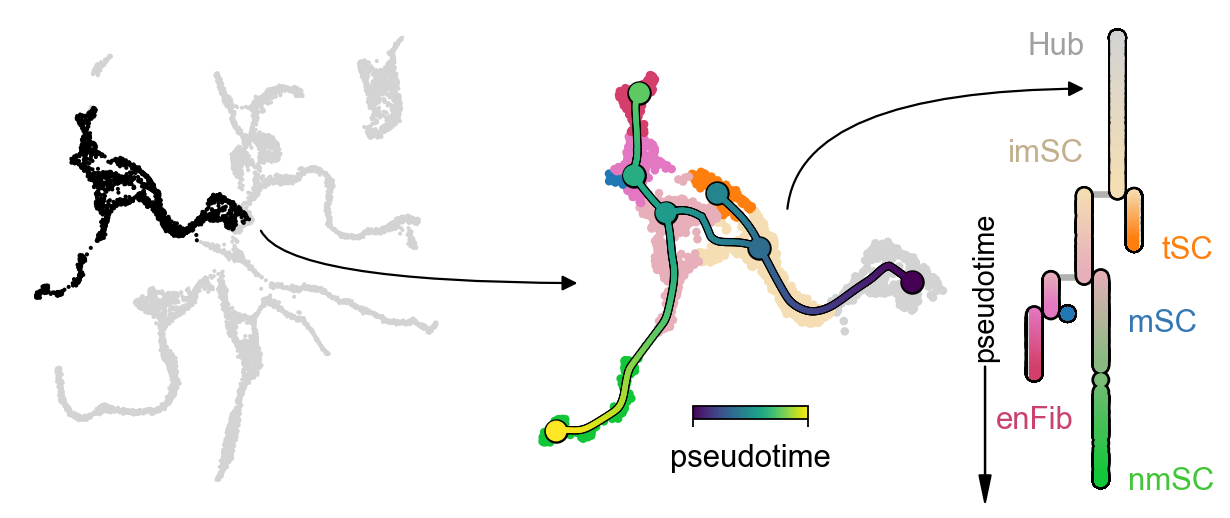

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
sc.set_figure_params(frameon=False,dpi_save=300)

fig,axs=plt.subplots(1,3,gridspec_kw=dict(width_ratios=[4,4,1]),figsize=(9,4))

sc.pl.umap(adata_all,color="sel",groups=["True"],palette=["k","k"],
           title="",legend_loc="none",ax=axs[0],show=False)

scf.pl.trajectory(adata[adata.obs.t.sort_values().index],ax=axs[1],show=False,color_cells="milestones",
                  title="",legend_loc="none",scale_path=.5)

axs[1].set_ylim([axs[1].get_ylim()[0]-dist/2,
                 axs[1].get_ylim()[1]+dist/2])

cax = fig.add_axes([0.65, 0.28, 0.08, 0.02],)


cb1 = mpl.colorbar.ColorbarBase(cax, cmap=plt.get_cmap("viridis"),
                                orientation='horizontal'  ,                    
                                ticks=[0,1],
                                label="pseudotime"
                                )

cb1.ax.set_xticklabels(['', ''])

scf.pl.dendrogram(adata,color_milestones=True,s=100,frameon=False,
                  add_outline=True,clip_on=False,tree_behind=True,
                  ax=axs[2],show=False)

axs[2].annotate("Hub",(.5,.92),xycoords="axes fraction",ha="right",color="#a0a0a0")

axs[2].annotate("imSC",(.5,.7),xycoords="axes fraction",ha="right",color="#c2af8d")

axs[2].annotate("nmSC",(0.9,0.025),xycoords="axes fraction",color="#43c538")

axs[2].annotate("enFib",(-0.3,0.15),xycoords="axes fraction",color="#ca436d")

axs[2].annotate("mSC",xy=(0.5,0.35),xytext=(.9,.35),xycoords="axes fraction",color="#3577b3")

axs[2].annotate("tSC",(1.2,0.5),xycoords="axes fraction",color="tab:orange")

axs[2].annotate("pseudotime",(-.4,0),(-.4,.3),xycoords="axes fraction",rotation=90,horizontalalignment='center',size=13,
            arrowprops=dict(facecolor="black",width=.1,headwidth=5))

axs[0].annotate("",
                xy=(0.55, .58), xycoords='axes fraction',
                xytext=(1.3, .45), textcoords='axes fraction',
                arrowprops=dict(arrowstyle="<|-", color="k",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="angle3,angleA=0,angleB=90",
                                ),
                )

axs[1].annotate("",
                xy=(0.6, .58), xycoords='axes fraction',
                xytext=(1.3, .85), textcoords='axes fraction',
                arrowprops=dict(arrowstyle="<|-", color="k",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="angle3,angleA=0,angleB=90",
                                ),
                )

plt.savefig("figures/fig7b.pdf",dpi=300)

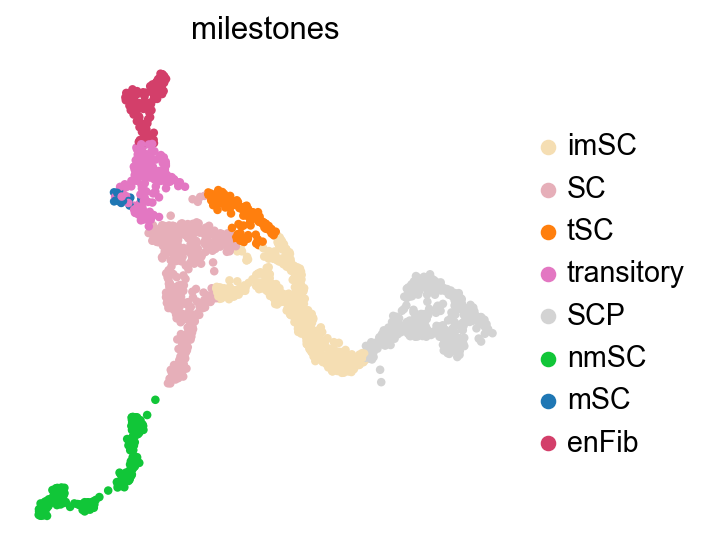

In [7]:
sc.pl.umap(adata,color="milestones")

In [8]:
sc.tl.rank_genes_groups(adata,"milestones")

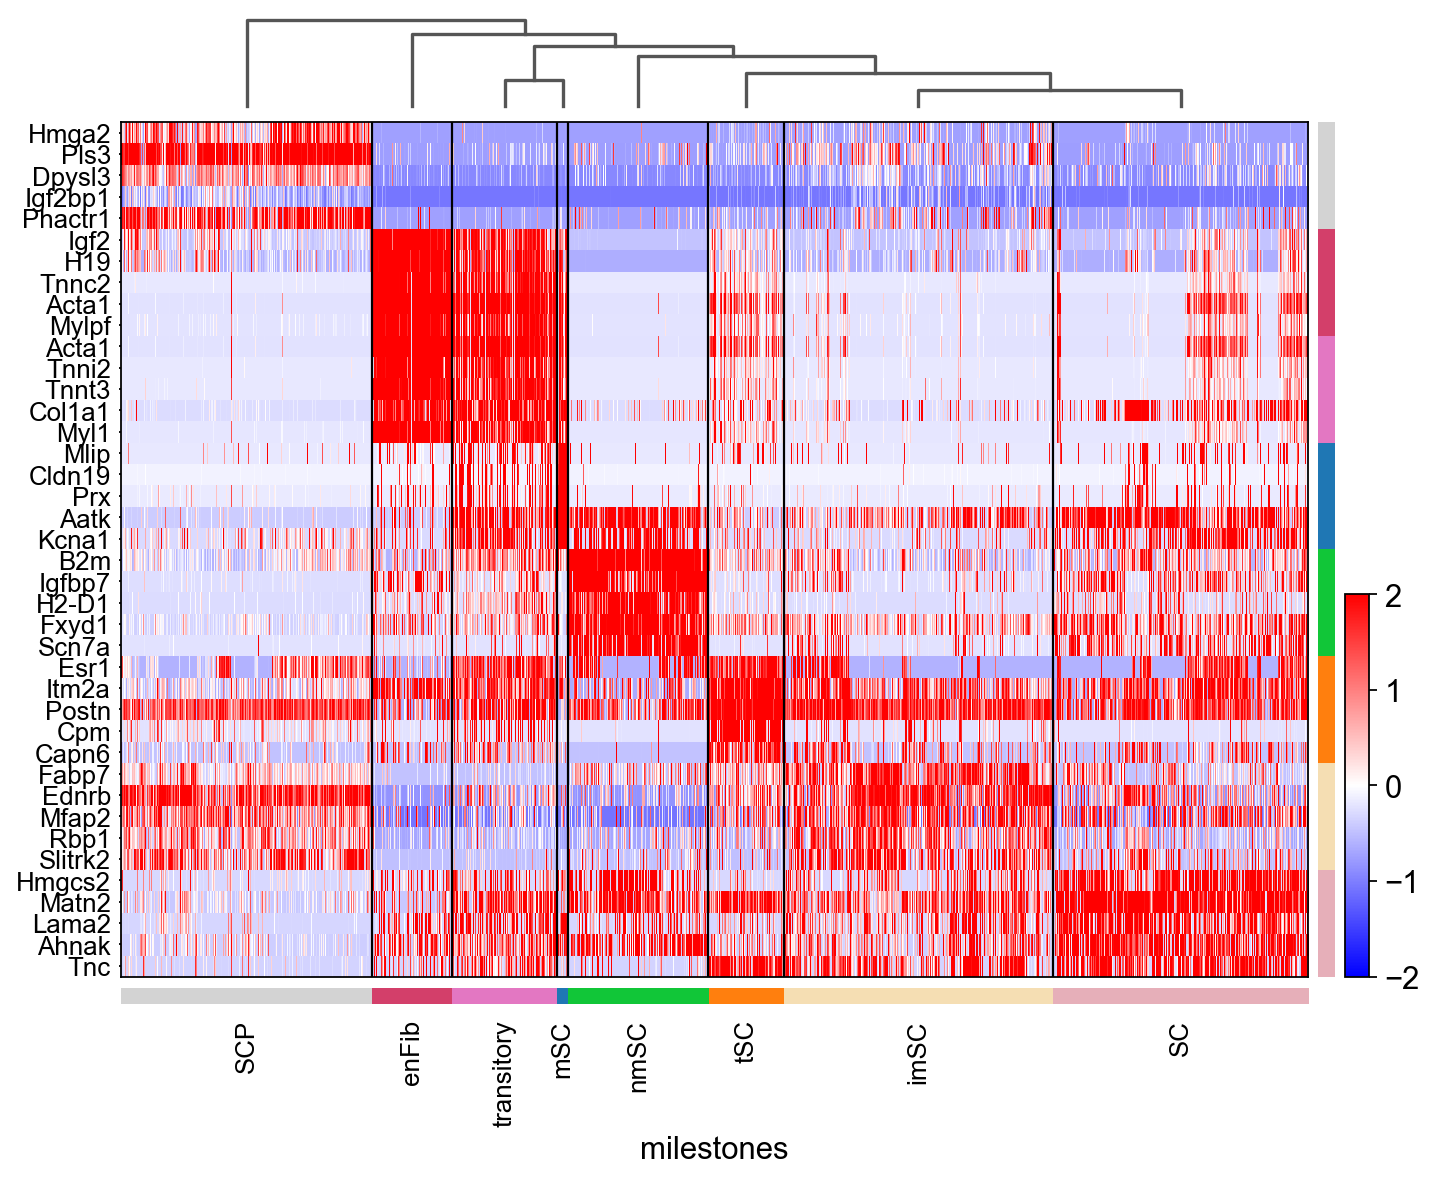

In [9]:
sc.pl.rank_genes_groups_heatmap(adata,n_genes=5,swap_axes=True,layer="scaled",cmap="bwr",vmax=2,vmin=-2)

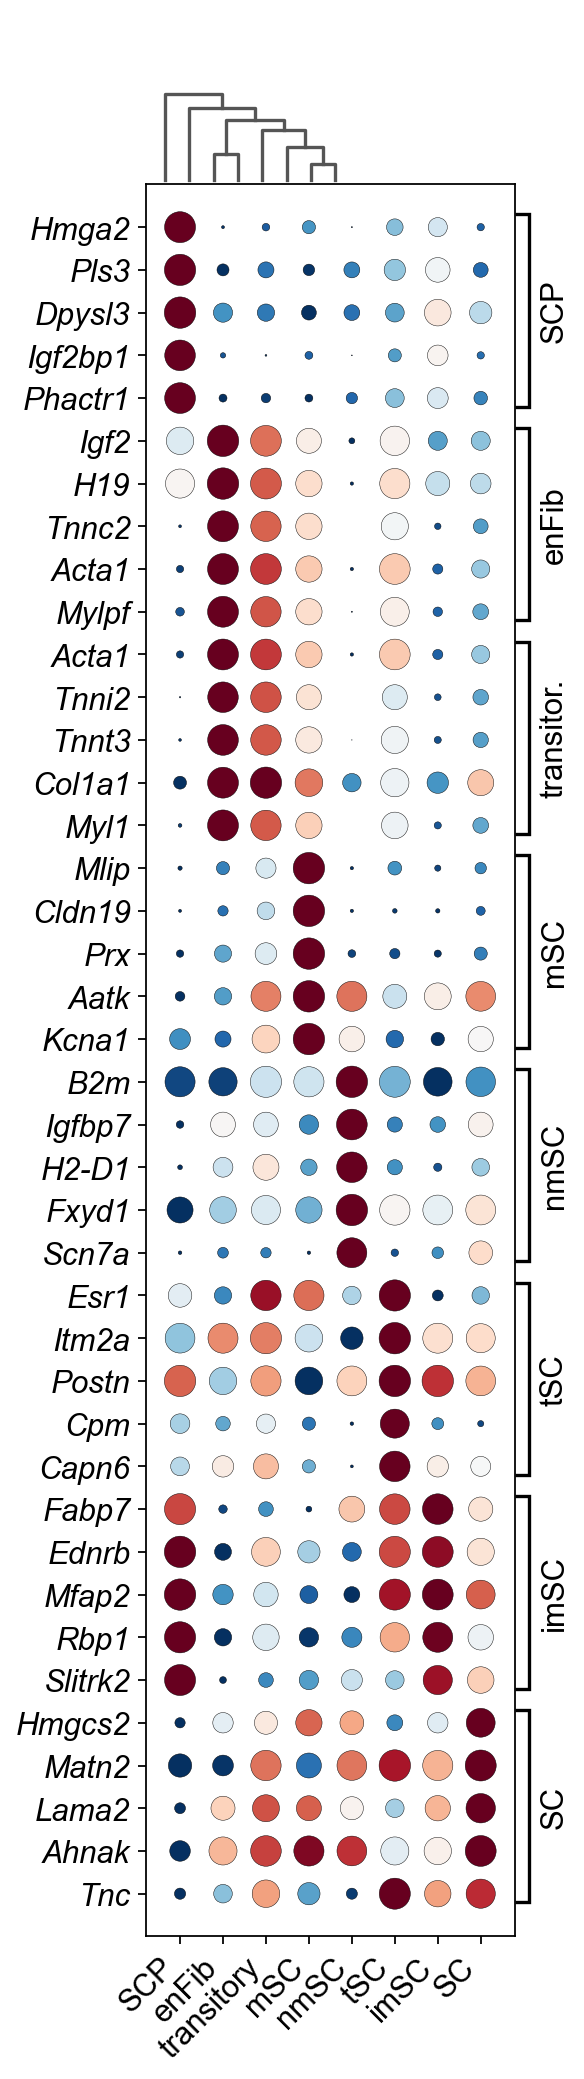

In [10]:
ax=sc.pl.rank_genes_groups_dotplot(adata,n_genes=5,standard_scale="var",show=False,
                                var_group_rotation=0,swap_axes=True,cmap="RdBu_r",colorbar_title="standardized\nexpression")

main = ax["mainplot_ax"].get_position().bounds
groups=ax["gene_group_ax"].get_position().bounds
leg=ax["size_legend_ax"].get_position().bounds
tot_width=leg[0]+leg[2]
toadd=tot_width-groups[0]

ax["size_legend_ax"].remove()
ax["color_legend_ax"].remove()
ax["gene_group_ax"].set_position([groups[0]+toadd,groups[1],groups[2],groups[3]])
ax["mainplot_ax"].set_position([main[0],main[1],main[2]+toadd,main[3]])
ax["mainplot_ax"].figure.set_figwidth(ax["mainplot_ax"].figure.get_figwidth()-1.5)
plt.setp(ax['mainplot_ax'].get_yticklabels(),fontsize=14, rotation=0, ha="right", rotation_mode="anchor",style="italic");
plt.setp(ax['mainplot_ax'].get_xticklabels(),fontsize=14, rotation=45,ha="right",va="top");
plt.setp(ax["gene_group_ax"].texts,fontsize=14, rotation=90,ha="center");

plt.savefig("figures/fig7a.pdf",dpi=300)

In [11]:
#adata_velo=sc.read("data/adata_velo.h5ad")
import scvelo as scv
adata_velo=scv.read("velo/brie_cytotrace.h5ad")

In [12]:
adata.obs.milestones

SS2_15_0073:A21_unique.bam    SCP
SS2_15_0073:A23_unique.bam    SCP
SS2_15_0073:B18_unique.bam    SCP
SS2_15_0073:D22_unique.bam    SCP
SS2_15_0073:G21_unique.bam    SCP
                             ... 
SS2_20_087:I2_unique.bam      SCP
SS2_20_087:J18_unique.bam     SCP
SS2_20_087:M20_unique.bam     SCP
SS2_20_087:N14_unique.bam     SCP
SS2_20_087:N18_unique.bam     SCP
Name: milestones, Length: 2030, dtype: category
Categories (8, object): ['imSC', 'SC', 'tSC', 'transitory', 'SCP', 'nmSC', 'mSC', 'enFib']

In [13]:
adata_velo=adata_velo[adata.obs_names]
adata_velo.obs["milestones"]=adata.obs.milestones
adata_velo.obsm=adata.obsm
adata_velo.uns['milestones_colors']=adata.uns['milestones_colors']

In [14]:
import numpy as np

idx = (np.min(adata_velo.varm['fdr'], axis=1) < 1e-40)
gene_use = adata_velo.var.index[idx]
scv.tl.velocity_graph(adata_velo, gene_subset=gene_use)
scv.tl.velocity_embedding(adata_velo)

or is corrupted (e.g. due to subsetting). Consider recomputing with `pp.neighbors`.
computing neighbors
    finished (0:00:11) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/88 cores)


  0%|          | 0/2030 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


In [15]:
adata_velo

AnnData object with n_obs × n_vars = 2030 × 1821
    obs: 'plates', 'devtime', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC', 'doublet_scores', 'leiden', 'CytoTRACE', 'batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'milestones', 'velocity_self_transition'
    var: 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'means', 'dispersions', 'dispersions_norm', 'n_counts', 'n_counts_uniq', 'loss_gene', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'Xc_ids', 'brie_losses', 'brie_param', 'brie_version', 'devtime_colors', 'leiden', 'leiden_colors', 'leiden_sizes', 'location_colors', 'log1p', 'paga', 'umap', 'milestones_colors', 'neighbors', 'velocity_params', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_R', 'X_d

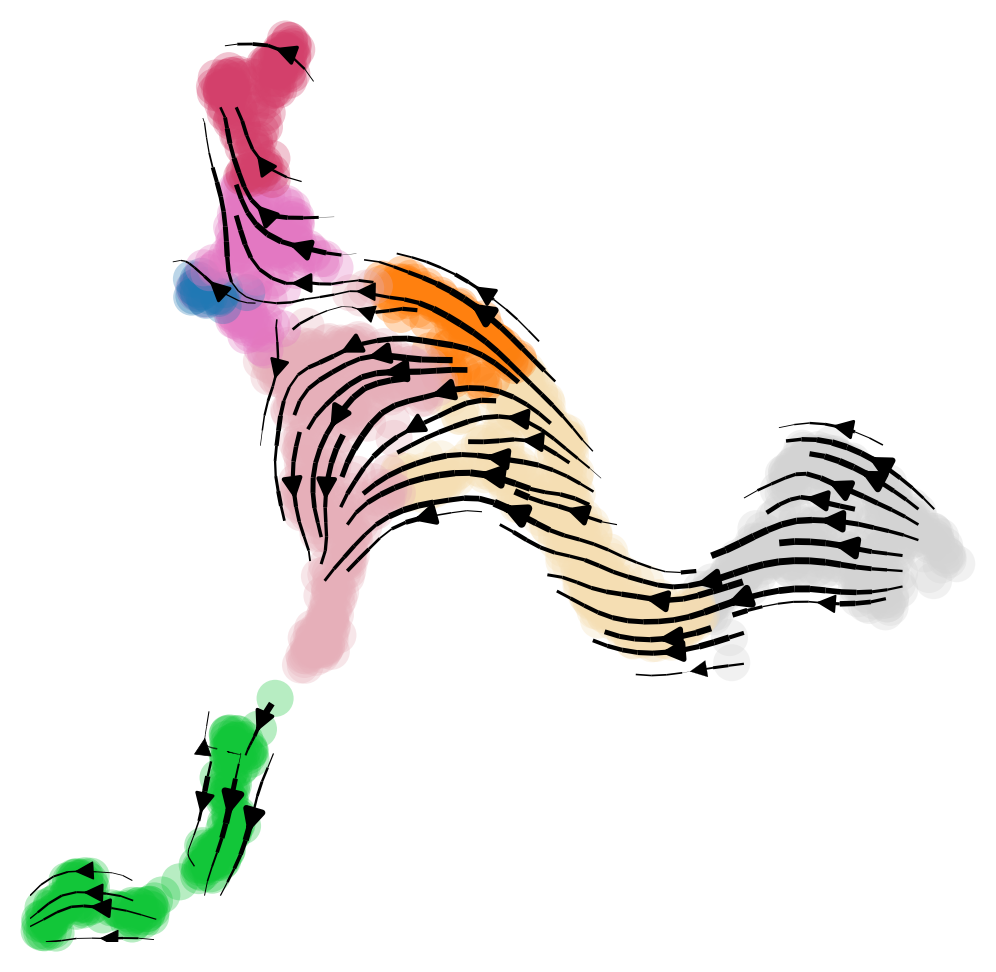

In [16]:
scv.set_figure_params(figsize=(4,4))
ax=scv.pl.velocity_embedding_stream(adata_velo[adata.obs.t.sort_values().index], 
                                    title="",show=False,legend_fontsize=16,legend_loc="none",
                                 basis='umap',color="milestones",dpi=150,clip_on=False)
ax.set_rasterized(True)
plt.savefig("figures/fig7c.png",dpi=300)

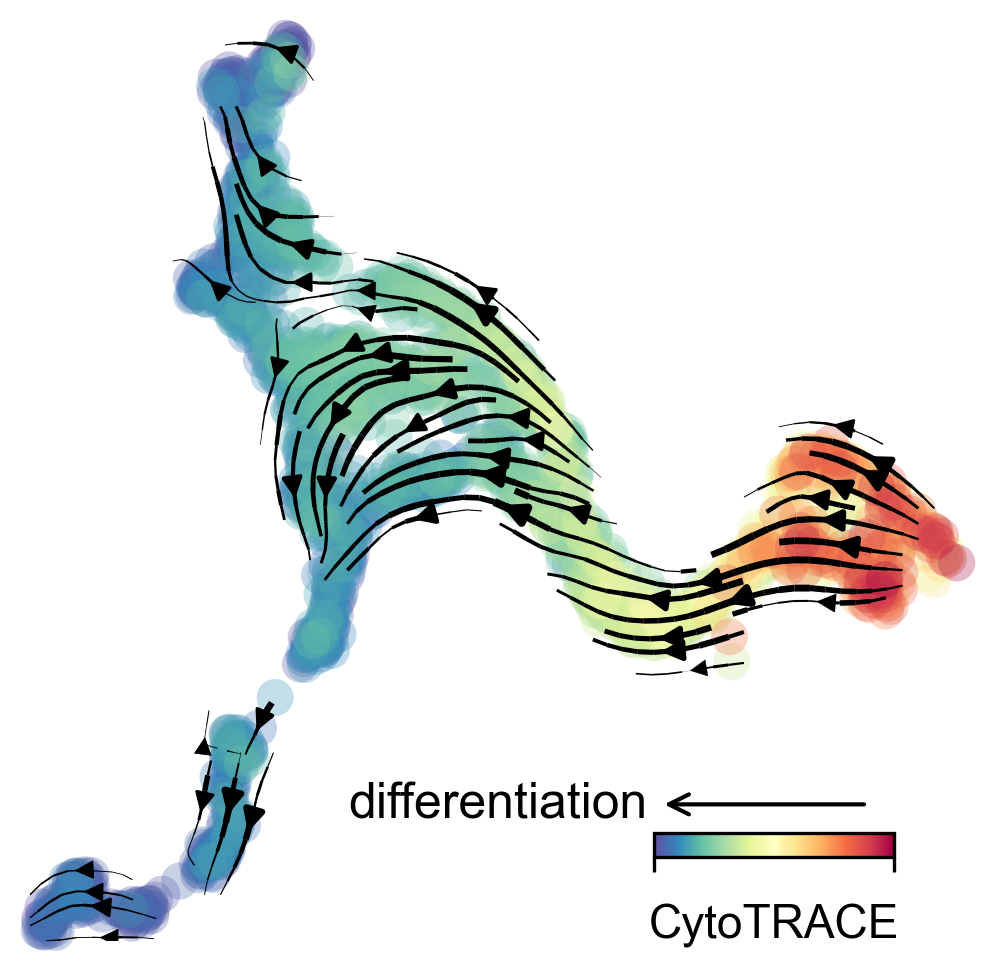

In [17]:
fig,ax=plt.subplots(dpi=150)
scv.pl.velocity_embedding_stream(adata_velo[adata.obs.t.sort_values().index], title="",colorbar=False,show=False,ax=ax,
                                 basis='umap',color="CytoTRACE",cmap="Spectral_r",dpi=150,clip_on=False)

cax = fig.add_axes([0.7, 0.22, 0.2, 0.02],)
cb1 = mpl.colorbar.ColorbarBase(cax, cmap=plt.get_cmap("Spectral_r"),
                                orientation='horizontal'  ,                    
                                ticks=[0,1],
                                label="CytoTRACE"
                                )

cb1.ax.set_xticklabels(['', ''])
ax.annotate("differentiation",xy=(.9,.15),va="center",ha="center",xytext=(.5,.15), arrowprops=dict( arrowstyle="<-" ),xycoords="axes fraction")
ax.set_rasterized(True)
plt.savefig("figures/fig7d.pdf",dpi=300)


In [18]:
markers=["Kctd12","Igf2bp1",
                     "Mki67",
                     "Cpm","Pou3f1","Itga8",
                     "Igf2","Cd34","Pdgfra",
                     "Mpz","Mal","Dhh","Egr2","Pmp22"]

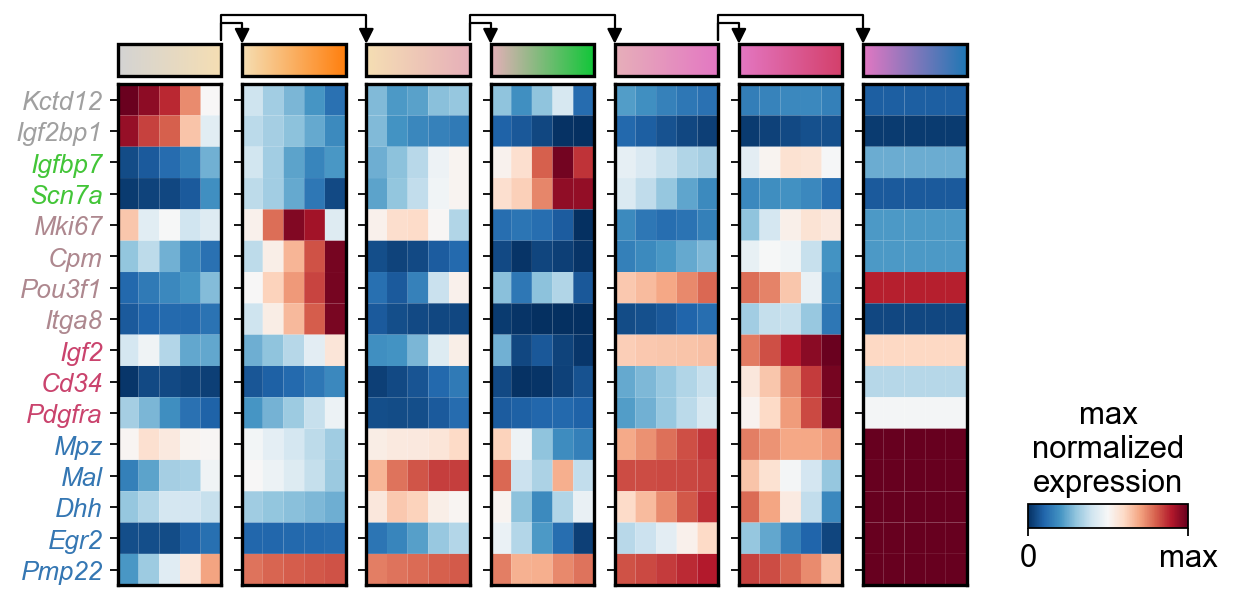

In [19]:
import pandas as pd
cols=pd.Series(["#a0a0a0","#a0a0a0",
           "#43c538","#43c538",
           "#ae888f",
           "#ae888f","#ae888f","#ae888f",
           "#ca436d","#ca436d","#ca436d",
           "#3577b3","#3577b3","#3577b3","#3577b3","#3577b3"
           ],index=["Kctd12","Igf2bp1",
                     "Igfbp7","Scn7a",
                     "Mki67",
                     "Cpm","Pou3f1","Itga8",
                     "Igf2","Cd34","Pdgfra",
                     "Mpz","Mal","Dhh","Egr2","Pmp22"])

sc.set_figure_params()
ax=scf.pl.matrix(adata,["Kctd12","Igf2bp1",
                     "Igfbp7","Scn7a",
                     "Mki67",
                     "Cpm","Pou3f1","Itga8",
                     "Igf2","Cd34","Pdgfra",
                     "Mpz","Mal","Dhh","Egr2","Pmp22"],edgecolors="face",linewidth=0.0,rasterized=True,nbins=5,feature_style="italic",cmap="RdBu_r",show=False)
lst=[]
for txt in ax[0].get_yticklabels():
    txt.set_color(cols[txt.get_text()])
plt.savefig("figures/fig7e.pdf",dpi=300)

In [34]:
known=["Itga4","Tfap2a","Cdh2","Cdh19","L1cam","Ngfr","Sox10","Fabp7","Dhh","Gap43","Plp1","S100b","Erbb3"]

In [22]:
import matplotlib.pyplot as plt

In [23]:
plt.rcParams["image.cmap"]

'RdBu_r'

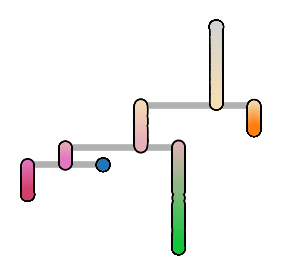

In [33]:
sc.set_figure_params(figsize=(2,2))
scf.pl.dendrogram(adata,color_milestones=True,tree_behind=True,add_outline=True,frameon=False)

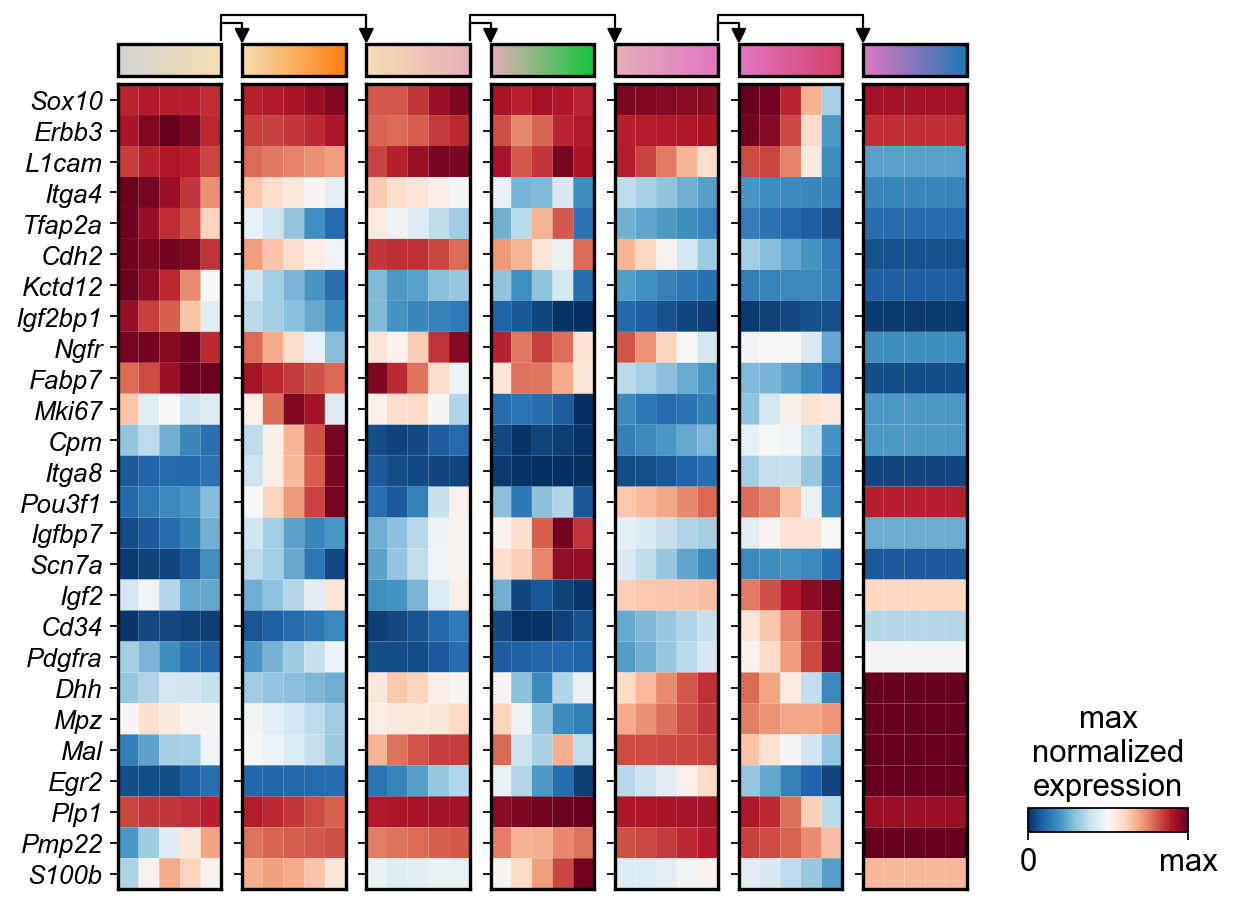

In [46]:
genes=["Sox10","Erbb3","L1cam",
       "Itga4","Tfap2a","Cdh2","Kctd12","Igf2bp1",
       "Ngfr","Fabp7",
       "Mki67","Cpm","Itga8","Pou3f1",
       "Igfbp7","Scn7a",
       "Igf2","Cd34","Pdgfra",
       "Dhh","Mpz","Mal","Egr2","Plp1",
       "Pmp22","S100b"]
scf.pl.matrix(adata,genes,feature_style="italic",linewidth=0.0,rasterized=True,save="fig7e.pdf")

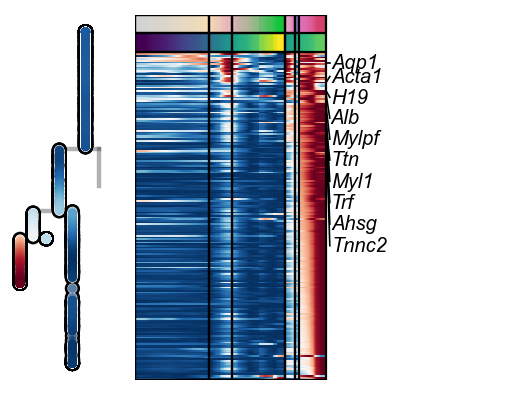

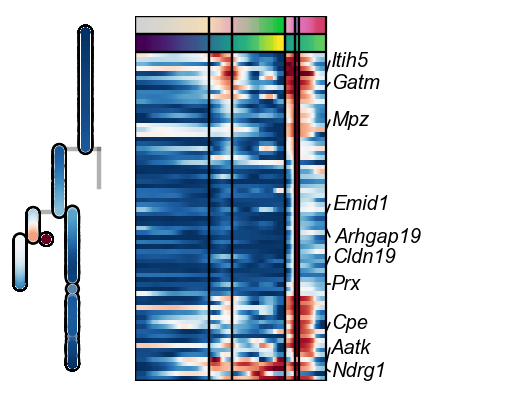

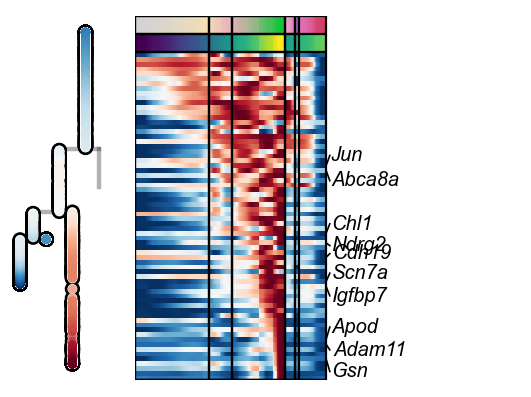

In [47]:
r="SCP"
m=["enFib","mSC","nmSC"]
sc.set_figure_params(figsize=(1,4))
scf.pl.trends(adata,root_milestone=r,milestones=m,basis="dendro",frameon=False,tree_behind=True,add_outline=True,
              branch=m[0],ordering="max",clip_on=False,wspace=0.1,style="italic",
              figsize=(4,3),heatmap_space=.01,offset_names=.02,linewidth_seg=2,annot="milestones",save="fig7f1.pdf")

scf.pl.trends(adata,root_milestone=r,milestones=m,basis="dendro",frameon=False,tree_behind=True,add_outline=True,
              branch=m[1],ordering="max",clip_on=False,wspace=0.1,style="italic",
              figsize=(4,3),heatmap_space=.01,offset_names=.02,linewidth_seg=2,annot="milestones",save="fig7f2.pdf")

scf.pl.trends(adata,root_milestone=r,milestones=m,basis="dendro",frameon=False,tree_behind=True,add_outline=True,
              branch=m[2],ordering="max",clip_on=False,wspace=0.1,style="italic",
              figsize=(4,3),heatmap_space=.01,offset_names=.02,linewidth_seg=2,annot="milestones",save="fig7f3.pdf")

In [ ]:
fname="fig7"

In [49]:
%%bash -s $fname
cat<<EOF >$1.tex
\documentclass{article}
\usepackage[paperheight=250mm,paperwidth=250mm]{geometry}
 \geometry{
 left=5mm,
 right=5mm,
 top=5mm,
 bottom=5mm,
 }

\usepackage[labelfont=bf]{caption}
\usepackage{multirow}
\usepackage[rgb]{xcolor}
\usepackage{fontspec}
\usepackage[utf8]{inputenc}
\usepackage[T1]{fontenc}
\usepackage{graphicx} 
\usepackage{svg}
\begin{document}
\setmainfont{Arial}

\definecolor{Blue}{RGB}{50, 49, 145}

\noindent
\large 

\begin{minipage}[t]{.72\textwidth}
\begin{minipage}[t]{.34\textwidth}
\raggedright \textbf{A} \textcolor{Blue}{Tree milestones markers}
\includegraphics[trim=0 0 0 .5in,width=1\textwidth]{figures/fig7a.pdf}
\end{minipage}\hfill
\begin{minipage}[t]{.65\textwidth}
\raggedright \textbf{B} \textcolor{Blue}{Extraction of the glial trajectory}
\includegraphics[width=1\textwidth]{figures/fig7b.pdf}

\begin{minipage}[t]{.49\textwidth}
\raggedright \textbf{C} \textcolor{Blue}{Tree milestones}
\includegraphics[width=1\textwidth]{figures/fig7c.png}
\end{minipage}\hfill
\begin{minipage}[t]{.48\textwidth}
\raggedright \textbf{D} \textcolor{Blue}{Differentiation measure}
\includegraphics[width=1\textwidth]{figures/fig7d.pdf}
\end{minipage}\hfill

\raggedright \textbf{E} \textcolor{Blue}{Evolution of selected markers over the trajectory}
\includegraphics[width=1\textwidth]{figures/matrixfig7e.pdf}
\end{minipage}\hfill
\end{minipage}\hfill
\begin{minipage}[t]{.27\textwidth}
\raggedright \textbf{F} \textcolor{Blue}{Late markers}

\center enFib
\includegraphics[trim=0 0 .5in 0,width=1\textwidth]{figures/trendsfig7f1.pdf}
\center mSC
\includegraphics[trim=0 0 .5in 0,width=1\textwidth]{figures/trendsfig7f2.pdf}
\center nmSC
\includegraphics[trim=0 0 .5in 0,width=1\textwidth]{figures/trendsfig7f3.pdf}
\end{minipage}\hfill

\hfill
\clearpage


EOF

echo "\end{document}" >> $1.tex

xelatex --shell-escape $1.tex
rm $1.tex
convert -flatten -density 300 $1.pdf $1.jpg
identify $1.pdf

This is XeTeX, Version 3.14159265-2.6-0.999991 (TeX Live 2019/Debian) (preloaded format=xelatex)
 \write18 enabled.
entering extended mode
(./fig6.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption.sty
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption3.sty))
(/usr/share/texlive/texmf-dist/tex/latex/multirow/multirow.sty)
(/usr/share/texlive/texmf-dist/tex/latex/xcolor/xcolor.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/color.cfg)
(/usr/share/texlive/texmf-dist/t

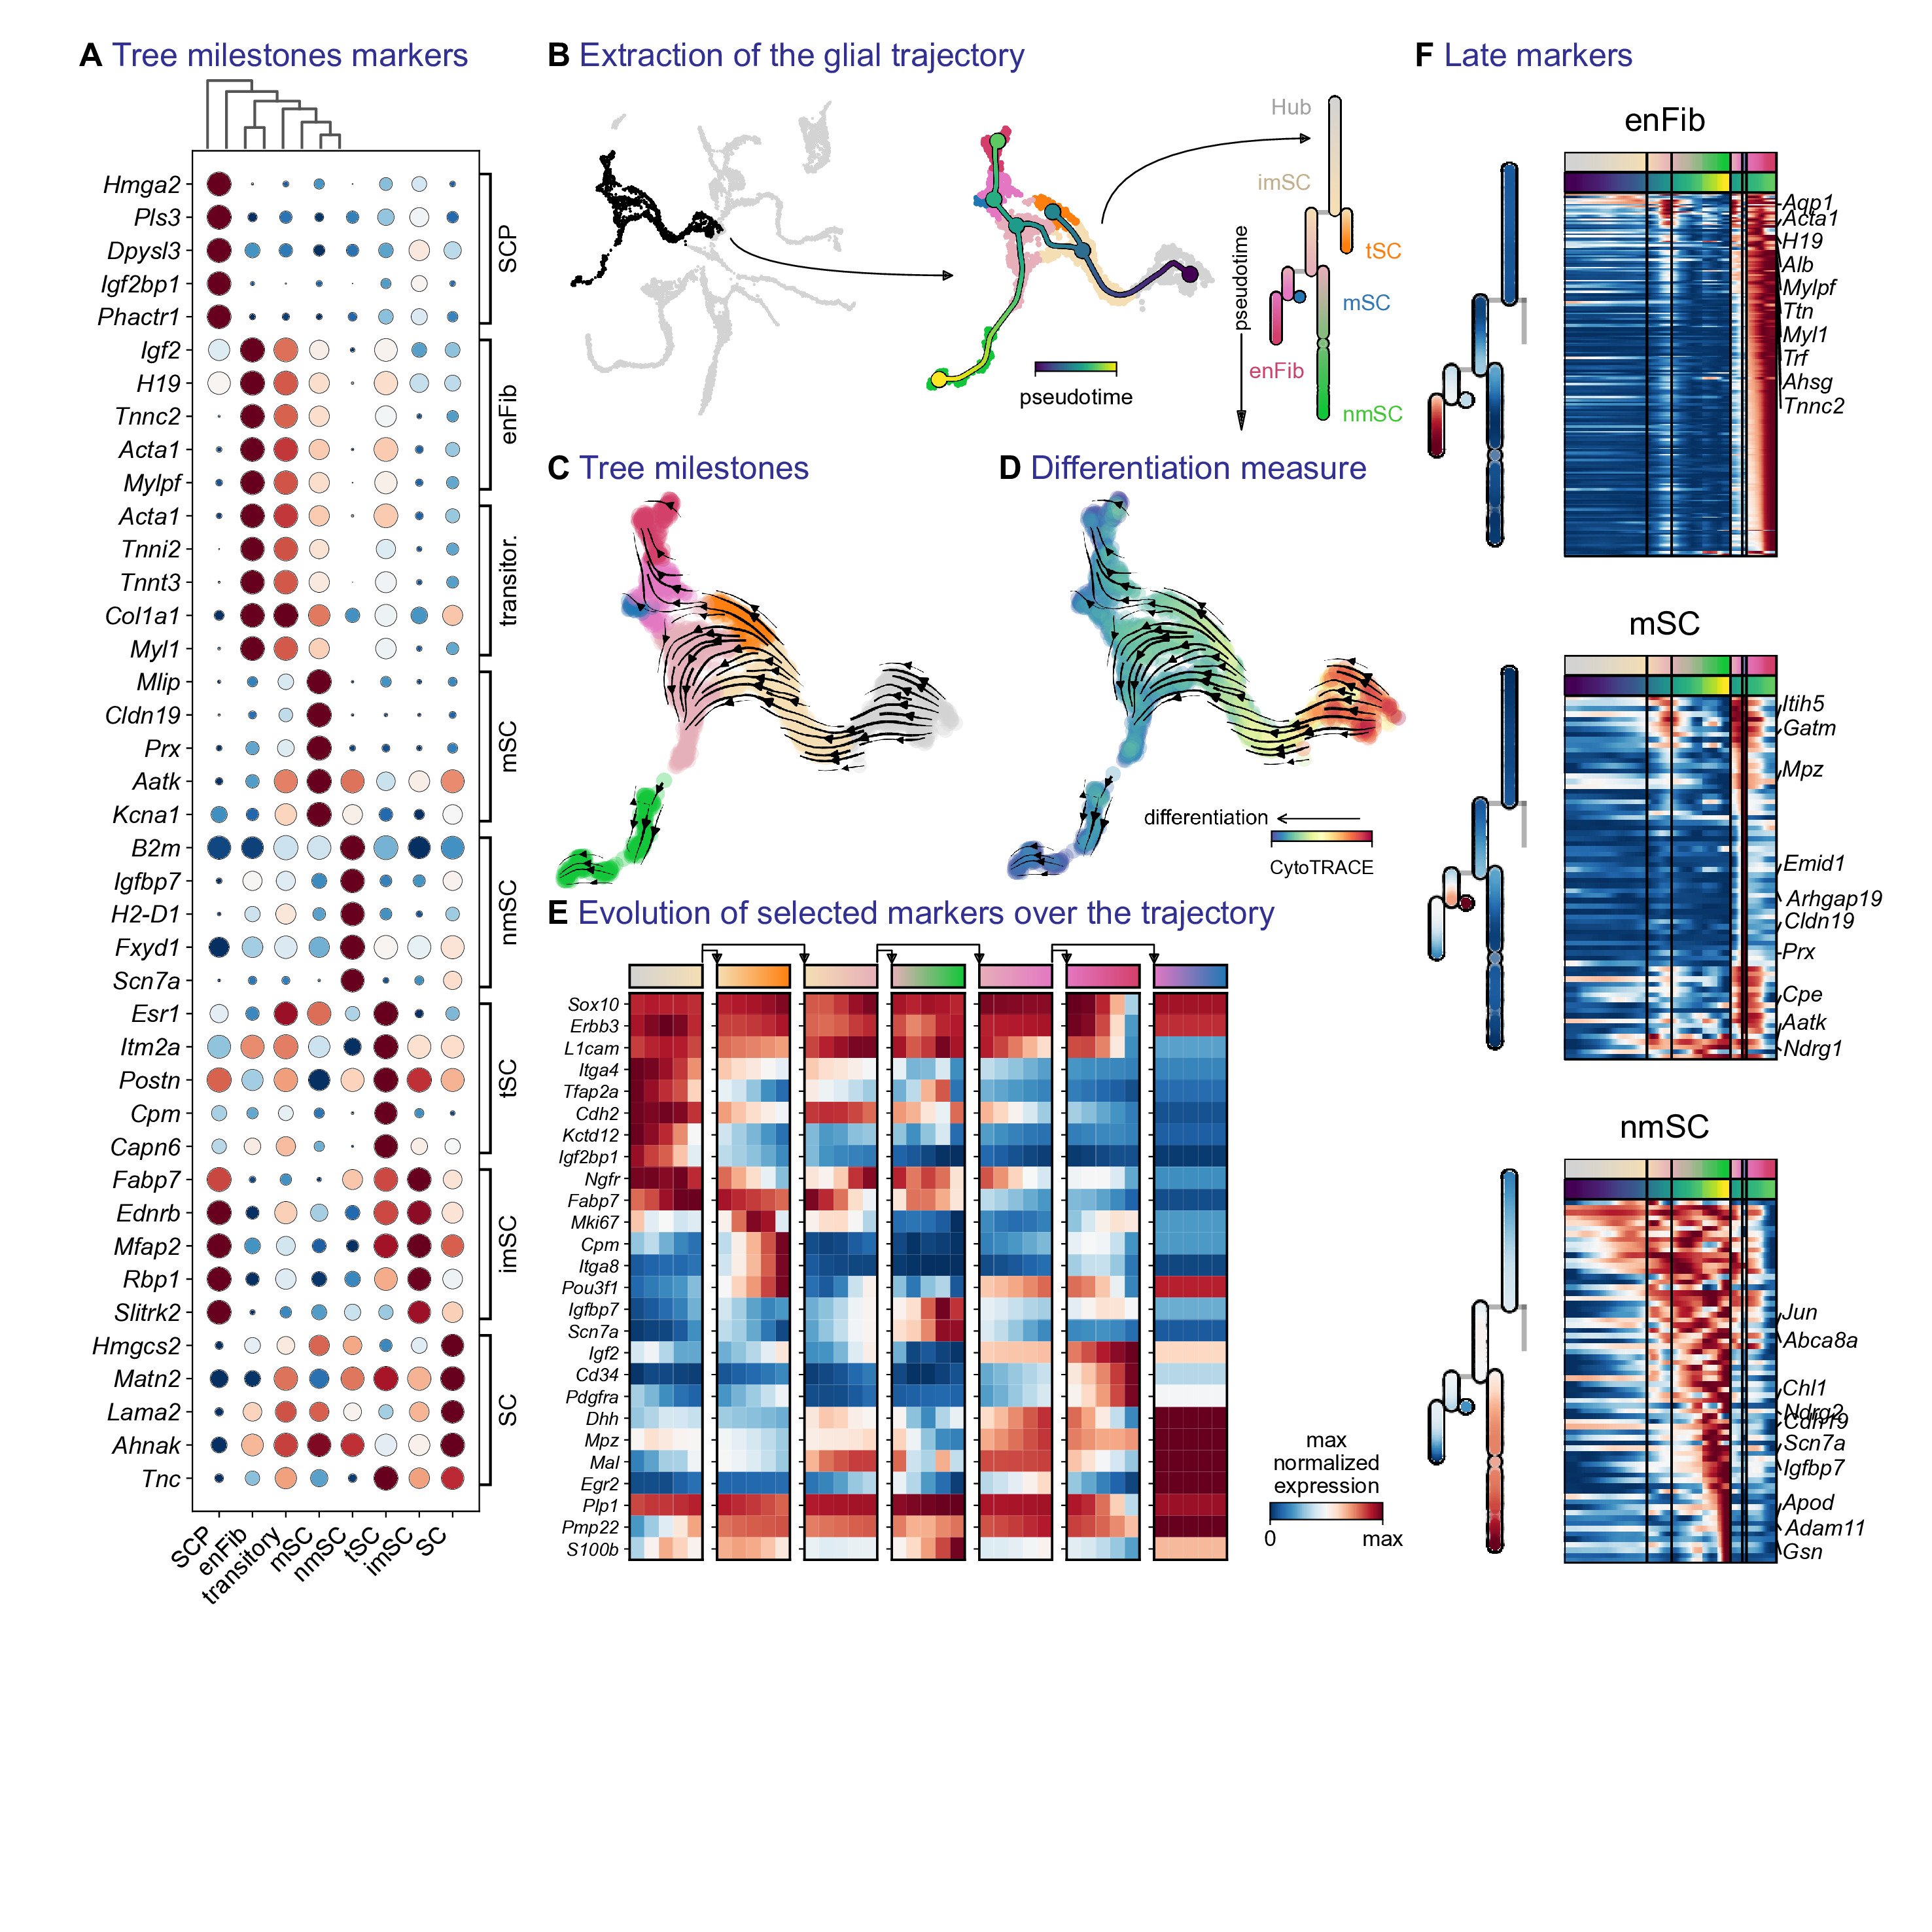

In [50]:
from IPython.display import Image
Image(filename=fname+'.jpg') 

## ADD Ets1 and Six1 UMAPs